## Log returns and Simple returns

Insight: If innovations in log returns are iid then, log returns at long enough horizons must be normal (Central Limit Theorem)

$$1+𝑅_{1→𝑇}=((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇))⁡\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡((1+𝑅_1 )(1+𝑅_2 )…(1+𝑅_𝑇 ))\\
ln⁡(1+𝑅_{1→𝑇} )=ln⁡(1+𝑅_1 )+ln⁡(1+𝑅_2 )+…+ln⁡(1+𝑅_𝑇 )\\
                    𝑟_{1→𝑇}=𝑟_1+𝑟_2+…+𝑟_𝑇 $$ 



* Thus, if T is large, $𝑟_{1→𝑇}$ will be approximately normally distributed. (central limit theorem)

* $𝑟_𝑡=ln⁡(1+𝑅_𝑡 )$ is the rate of return assuming continuous compounding for the period t.

* This turns out to hold up well if you look at horizons longer than a month, but does not work at all at daily frequency (much fatter left tail than the normal distribution predicts)


* Log returns are also very convenient when thinking about long-term investing

In [33]:
print([np.log(1+Data.MKT).skew(),X.skew()])

print([np.log(1+Data.MKT).kurtosis(),X.kurtosis()])

[-0.7707864524331097, -0.10212480191113225]
[2.859221702344219, -0.17043746558020745]


#### How to go back and fourth between log and simple returns?

Let R be a simple net return per period, i.e., if you invest 10 , you get 10(1+R) in the end of the period

R is a number like 5% (0.05)

We say 1+R, a number like 1.05 is a gross return. 

Why gross? Because it includes 1, your initial investment.

* To get log returns: $r=log(1+R)$


* To get back simple returns: $R=exp(r)-1$

In [34]:
r=np.log(1+Data.MKT)
R=np.exp(r)-1
pd.concat([R,Data.MKT],axis=1).head()

,MKT,MKT
Date,,
1963-02-28,-0.0215,-0.0215
1963-03-31,0.0331,0.0331
1963-04-30,0.0476,0.0476
1963-05-31,0.0200,0.0200
1963-06-30,-0.0177,-0.0177


In [35]:
threshold=3
# now real data in log returns

A=((np.log(Data.MKT+1)-np.log(Data.MKT+1).mean())<-threshold*np.log(Data.MKT+1).std())
B=((X-X.mean())<-threshold*X.std())
[A.sum(),B.sum()]

[4, 0]

### The tangency portfolio and the cross-sectional of expected returns


* The optimal condition for our tangency portfolio:

$$ Var(R^e)W^*=cte \times E[R^e]$$

* This condition above defines the tangency portfolio

* We can rewirte the left hand side as

$$Var(R^e)W^*=Cov(R^e,R^e)W^*=Cov(R^e,(W^*)'R^e)=Cov(R^e,R^*)$$

* The left-hand side in the covariance vector of all the assets with the tangency portfolio

* This means that the expected return of an asset must be proportional to the covariance between the return of the asset and the return of the tangency portfolio

$$ E[R^e]=cte \times Cov(R^e,R^*) $$


* This holds for all assets in your investment opportunity set (i.e. the assets included in the minimization problem that the tangency portfolio solves)


* This means that for any assets $j$ and $i$ we have 


$$\frac{E[R^e_i]}{Cov(R^e_i,R^*)}= \frac{E[R^e_j]}{Cov(R^e_j,R^*)} $$ 


* All assets have the same expected return per-unit of covariance with the tangency portoflio

* We can also apply this to the tangency portfolio itself


$$ E[R^*]=cte \times Cov(R^*,R^*) $$


* Which means that $cte=\frac{E[R^*]}{Var(R^*)}$


* Plugging back in the original and we get that for any asset $j$


$$ E[R^e_j]=\frac{E[R^*]}{Var(R^*)} Cov(R^e_j,R^*) =\frac{Cov(R^e_j,R^*)}{Var(R^*)}E[R^*]=\beta_{j,*}E[R^*] $$



$$ E[R^e_j]=\beta_{j,*}E[R^*] $$

> What does that remind you?

* All the information about the cross-sectional of expected returns--all the assets-- can be summarized by the expected return of the tangency portfolio and the beta of each asset with respect to the tangency portfolio

* Or Alternatively: the risk-return trade-off  of the tangency portfolio  $\frac{E[R^*]}{Var(R^*)}$ and the covariance of each asset with it.


* Once you have the right notion of risk, the reward to risk is the same across assets (no free lunch)

* What is the right notion? Covariance with the tangency portfolio

* In the sample that you estimated the moments this will be true by construction!

Now we test if $ E[R^e_j]=\frac{Cov(R^e_j,R^*)}{Var(R^*)}E[R^*] $ in our sample

In [ ]:
Wstar

In [ ]:
Rstar=Re.copy()
Rstar['*']=Re @ Wstar
Rstar.cov()

In [ ]:
cov=Wstar @ Re.cov()
cov

In [ ]:
# expected return of the tangency portfolio
mu_star=Wstar @ Re.mean()
# variance of the tangency portfolio
var_star=(Wstar @ Re.cov() @ Wstar.T)
# covariance between each asset return and the tangency portfolio
cov=Wstar @ Re.cov()

predicted= mu_star/var_star*cov

print(predicted)

print(Re.mean())

* This comes from the fact that the tangency portfolio was constructed to be the portfolio with the maximum Sharpe Ratio
* It is a result of us knowing the moments of all assets summarized by $E[R^e]$  and $Var(R^e)$
* Here we did everything IN SAMPLE. We used sample moments and evalauted it's predictions using the same sample
* The challenge is that these moments are not always well estiamted, to put it mildly (more on this soon!)
* So the in sample tangency portfolio might not be very informative about the true tangency portfolio, which is the one that we actually care about

> Why? Because it can predict returns going forward and not only in sample (which is useless)

## T-stat

* T-stat for a given hypothesis $\mu_{j}^0$

$$t_j(\mu_0)=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$


## One-sided hypothesis testing
* For example lets assume we have strong theoretical reasons to believe that these assets must not have a negative expected returns. (True for the value-weighted stock market, less true for bonds)

* So lets do a 1-sided test with 5% interval and ask what it is the largest expected return $X_j$ that we can say with 95% confidence that the asset j has expected return higher than $X_j$

$$1.64=\frac{\bar{R_j}-\mu_{j}^0}{\sigma(\bar{R_j})}$$

* If we are evaluating the hypothesis that $\mu_{j}=0$, we say that 

  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}\geq 1.64$, we can statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we can statistically reject that $\mu_{j}=0$ with a 5% probabilit value (pvalue) )
  * if $\frac{\bar{R_j}-0}{\sigma(\bar{R_j})}<1.64$, we fail to statistically reject that $\mu_{j}=0$ with a 95% confidence (or alternatively: we fail to statistically reject that $\mu_{j}=0$ with a 5% probability value (pvalue) )
  

* Equivalently we can also construct our confidence intervals for the expected mean

$$\mu_{j}^{-,95\%}=\bar{R_j}-1.64\sigma(\bar{R_j})$$

$$\mu_{j}^{+,95\%}=\bar{R_j}+1.64\sigma(\bar{R_j})$$


* We say that this interval $[\mu_{j}^{-,95\%}, \mu_{j}^{+,95\%}]$ contains the true expected value with 95% probability

In [116]:
print(ERstd)

          avg_std       avg
MKTUS    0.001735  0.005140
BondUS   0.001377  0.002523
EM       0.002344  0.006923
MKTxUS   0.001836  0.004149
BondxUS  0.000793  0.002054


Here is a look at t-stats relative to a zero null-hypothesis (which is what people often do)


> Side comment: Why am using 1.64?

Recall from Notebook 3:

In [117]:
from scipy.stats import norm
ps=norm(0,1)
ps.isf(0.02)

2.053748910631823

In [118]:
# we can look at the t-stats (against zero) for the assets
# the average return divided by the average return estimator standard deviation
ERstd=pd.concat([ERstd, Re.mean()/(Re.std()/(T**0.5))],axis=1)
ERstd=ERstd.rename(columns={0:'t_stat'})
ERstd

,avg_std,avg,t_stat
MKTUS,0.001735,0.005140,2.962459
BondUS,0.001377,0.002523,1.832010
EM,0.002344,0.006923,2.953007
MKTxUS,0.001836,0.004149,2.259454
BondxUS,0.000793,0.002054,2.591087


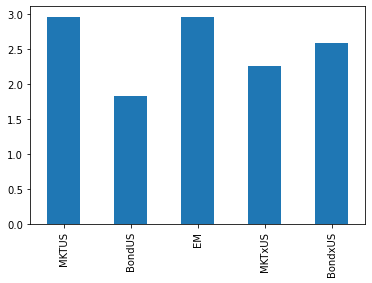

In [119]:
# Plot t-stats for each asset
ERstd.t_stat.plot.bar()
plt.show()

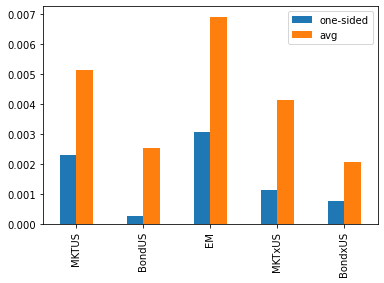

In [120]:
# Plot the left hand side of the confidence interval and the average return 
#   for each asset
ER0=pd.concat([Re.mean()-1.64*(Re.std()/(T**0.5)),Re.mean()],axis=1)
ER0=ER0.rename(columns={0:'one-sided',1:'avg'})
ER0.plot.bar()
plt.show()

## Two-sided intervals

* If we are more agnostic and believe less in the economic theories we have,

* Or the theories are silent

* For example, the theories are silent in long-short portfolios of equities, for example, the portfolio that goes long the US market and sells the international market.

* Then we must do a two-sided interval

> What is the 95% threshold for a two sided test?

In [121]:
ps.isf(0.05/2)

1.9599639845400545

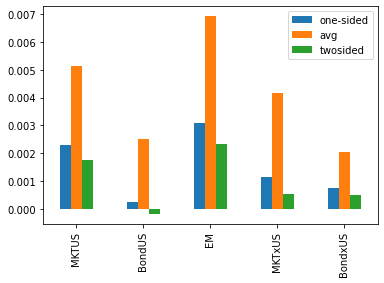

In [122]:
# Plot the lower bar of the two-sided confidence interval

ER0['twosided']=Re.mean()-1.96*(Re.std()/(Re.shape[0]**0.5))
ER0.plot.bar()
plt.show()

## Pvalues


* Instead of using our t-stats to do a test at a particular level of significance, say 95%

* We can use the normal cdf to find p-value, which gives us the highest level of significance our data is consistent with

* Here again, against the zero null hypothesis

In [123]:
# We can also construct p'values
from scipy.stats import norm
# and I am creating this `ps` object which is the standard normal distribution
ps=norm(0,1)

In [124]:
ps.isf(0.95)
ps.ppf(0.95)

1.6448536269514722

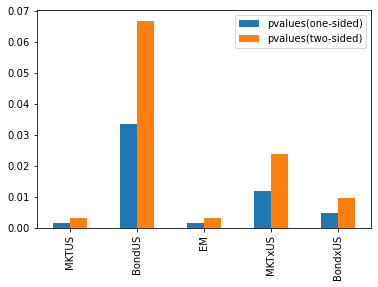

In [125]:
ER0['pvalues(one-sided)']=1-ps.cdf((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)
ER0['pvalues(two-sided)']=(1-ps.cdf(np.abs((Re.mean()/(Re.std()/(Re.shape[0]**0.5))).values)))*2
ER0[['pvalues(one-sided)','pvalues(two-sided)']].plot.bar()
plt.show()

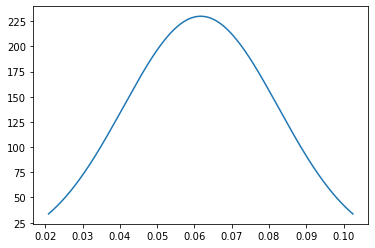

In [126]:
# lets look at a two-sided 95% confidence interval (I am annulaizing for convenience)

# (1) choose the confidence level
interval=0.95
# in the two-sided case, tail probability is half of (1-interval)
tails=(1-interval)/2

# (2) construct a normal distribution using the mean and standard deviation of a chosen asset
asset='MKTUS'
mu=Re[asset].mean()
mu_sigma=Re[asset].std()/Re[asset].count()**0.5
# do also at yearly, but do so with explanation

p=norm(mu,mu_sigma)

# (3) get the value of the left tail and the right tail
lefttail=p.ppf(tails)
righttail=p.ppf(1-tails)
# note that x=pnorm.isf(q) is the inverse of the CDF.
# The inverse CDF at `q` is also referred to as the `q quantile` of a distribution.
# For a continuous distribution `DIST`, the inverse CDF at q is the value x such that CDF[DIST,x]=q. 
# So there is exactly probability q that the realization is higher than x.

# or equivalently
#lefttail=mu+pnorm.isf(tails)*musigma
#righttail=mu+pnorm.isf(1-tails)*musigma

# (4) plot
grid=np.linspace(lefttail,righttail,1000)
# this constructs a grid going spanning the region given by the confidence interval

plt.plot(grid*12, p.pdf(grid))
plt.show()

## Test if all assets have the same average return

* A more relevant test is whether all these assets have the same average return

> Why that is the most relevant hypothesis for us as we do MV optimization?

* For assets that have a average return below the average, I compute the probability that this expected return is indeed below, and  for assets that have the avg return above avg I compute the probability that the expected return is indeed above the mean across assets

* I will simply use the absolute value to do that

In [127]:
Re.mean()

MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64

         one-sided       avg  twosided  pvalues(one-sided)  \
MKTUS     0.002295  0.005140  0.001739            0.001526   
BondUS    0.000264  0.002523 -0.000176            0.033475   
EM        0.003078  0.006923  0.002328            0.001573   
MKTxUS    0.001137  0.004149  0.000550            0.011928   
BondxUS   0.000754  0.002054  0.000500            0.004784   

         pvalues(two-sided)  same_avg_pvalue  
MKTUS              0.003052         0.571257  
BondUS             0.066950         0.235012  
EM                 0.003147         0.238187  
MKTxUS             0.023855         0.996144  
BondxUS            0.009567         0.007963  


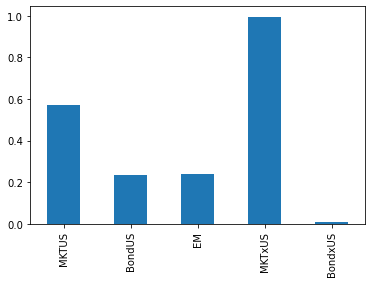

In [128]:

# ER0['same_avg_pvalue']=\
# (1-pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()>Re.mean().mean())\
# +(pnorm.cdf(((Re.mean()-Re.mean().mean())/(Re.std()/(Re.shape[0]**0.5))).values))*(Re.mean()<=Re.mean().mean())
#(probability of being above the average)*(average above avg across assets?)
#(probability of being below the average)*(average below avg across assets?)

# or much more easily:
# (1) save the standard deviation of the average excess return of each asset as `stdmean`
stdmean=Re.std()/(Re.shape[0]**0.5)
# (2) construct the t-stat for each asset
tstatmean=np.abs((Re.mean()-Re.mean().mean())/stdmean).values
# (3) calculate p-values for two-sided hypothesis testing
ER0['same_avg_pvalue']=(1-ps.cdf(tstatmean))*2

print(ER0)

# pvalue is the probability that the null hupothesis is right. So in this case it tells us that there is 
# a 60% probability that the mktus return equals to the average  and 100% probability that the MKTxUS expected return
# is equal to the average of all assets average returns

# here we can only clearly reject the hypothesis that non us bonds expected returns are equal to the average returns
ER0.same_avg_pvalue.plot.bar()
plt.show()

> Can you interepret this plot?